In [1]:
import os
import subprocess
import numpy as np

import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

In [2]:
dir_origin = os.path.join('/','home','arturo','Downloads','IMERG','IMERG_SA_1dy_1999_01_01_2023_12_31_01x01.nc')
dir_target = os.path.join('/','media','arturo','Arturo','Data','Brazil','IMERG','IMERG_2000_12_2021_02_1mo_05x05.nc')
dir_origin_regrid = os.path.join('/','home','arturo','Downloads','IMERG','IMERG_SA_1dy_1999_01_01_2023_12_31_05x05.nc')

In [3]:
subprocess.run([
        'cdo',
        f'remapbil,{dir_target}',
        dir_origin,
        dir_origin_regrid
        ])

cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - time_bnds


cdo    remapbil: Bilinear weights from lonlat (520x641) to lonlat (110x120) grid


CompletedProcess(args=['cdo', 'remapbil,/media/arturo/Arturo/Data/Brazil/IMERG/IMERG_2000_12_2021_02_1mo_05x05.nc', '/home/arturo/Downloads/IMERG/IMERG_SA_1dy_1999_01_01_2023_12_31_01x01.nc', '/home/arturo/Downloads/IMERG/IMERG_SA_1dy_1999_01_01_2023_12_31_05x05.nc'], returncode=0)

In [4]:
ds_origin = xr.open_dataset(dir_origin)
lon2d, lat2d = np.meshgrid(ds_origin['lon'].values, ds_origin['lat'].values)

ds_regridded = xr.open_dataset(dir_origin_regrid)
lon2d_regrid, lat2d_regrid = np.meshgrid(ds_regridded['lon'].values, ds_regridded['lat'].values)

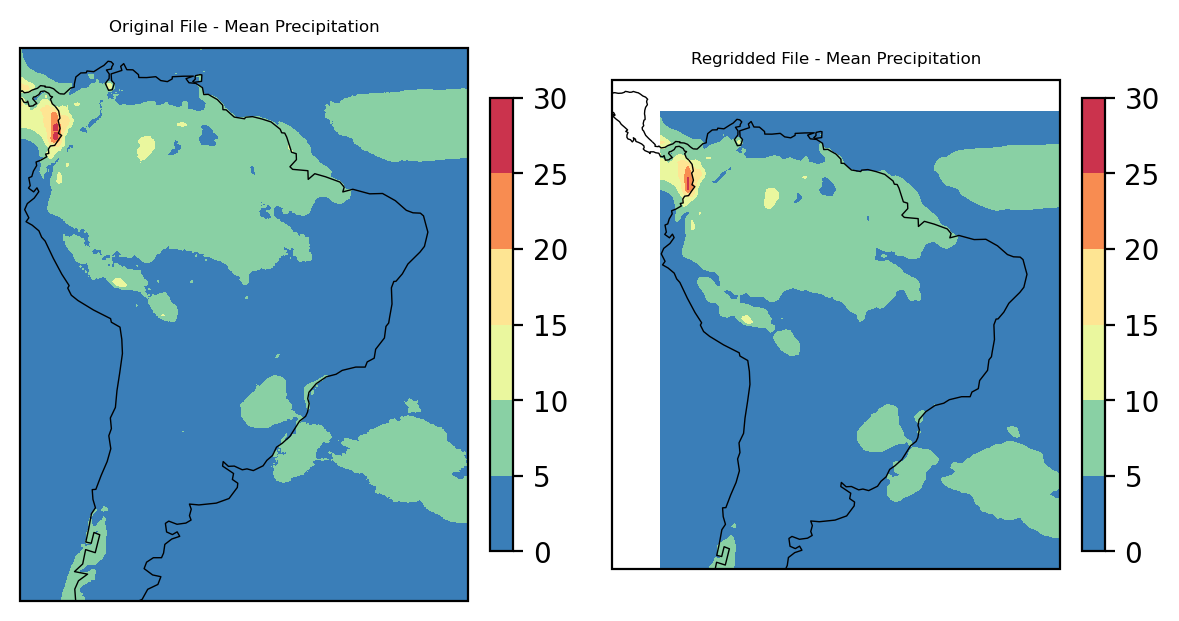

In [8]:
levels = np.arange(0,35,5)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, ds_origin.precipitation.mean(dim='time'),cmap=cmap, levels=levels)
plt.title("Original File - Mean Precipitation",fontsize=6)
plt.colorbar(a1,fraction=0.046, pad=0.045)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d_regrid, lat2d_regrid, ds_regridded.precipitation.mean(dim='time'),cmap=cmap, levels=levels)
plt.title("Regridded File - Mean Precipitation",fontsize=6)
plt.colorbar(a1,fraction=0.046, pad=0.045)

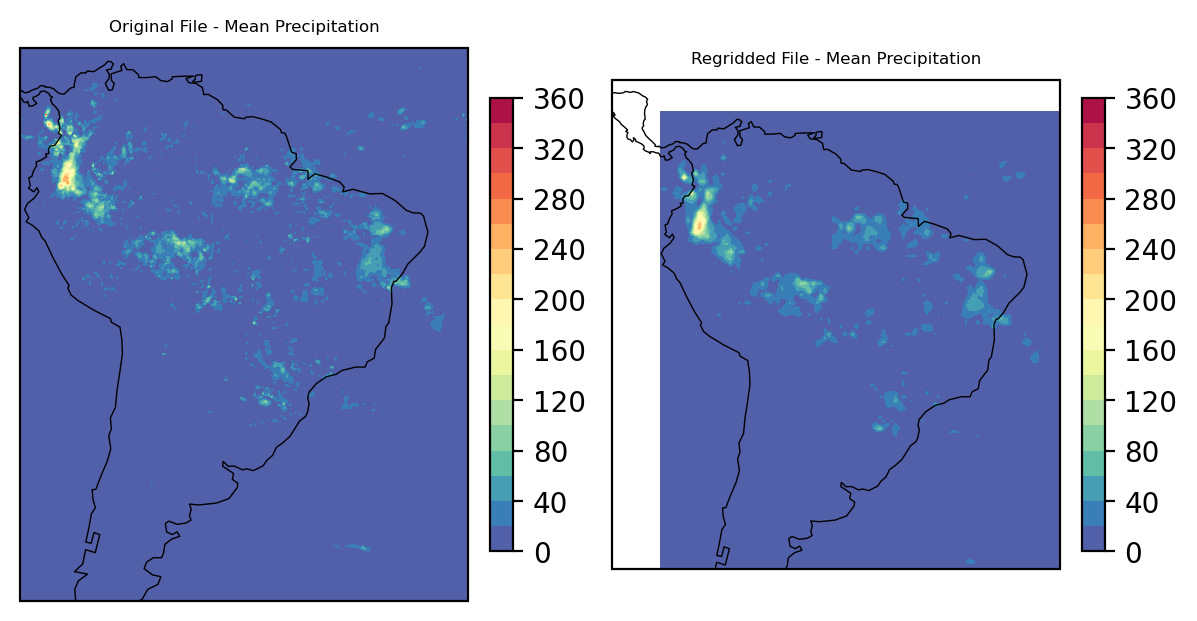

In [6]:
levels = np.arange(0,380,20)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, ds_origin.precipitation[10,:,:],levels=levels,cmap=cmap)
plt.title("Original File - Mean Precipitation",fontsize=6)
plt.colorbar(a1,fraction=0.046, pad=0.045)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d_regrid, lat2d_regrid, ds_regridded.precipitation[10,:,:],levels=levels,cmap=cmap)
plt.title("Regridded File - Mean Precipitation",fontsize=6)
plt.colorbar(a1,fraction=0.046, pad=0.045)

In [27]:
# Sumar las precipitaciones a lo largo del tiempo
precip_origin_total = ds_origin['precipitation'].sum(dim=['lat', 'lon'])
precip_regridded_total = ds_regridded['precipitation'].sum(dim=['lat', 'lon'])

# Calcular la diferencia total
total_diff = precip_regridded_total - precip_origin_total

# Mostrar la diferencia total
print(f"Total precipitation difference: {total_diff.values}")


Total precipitation difference: [-1613077.9 -1707179.5 -1698314.4 ... -1317546.  -1133724.5  -926374.1]


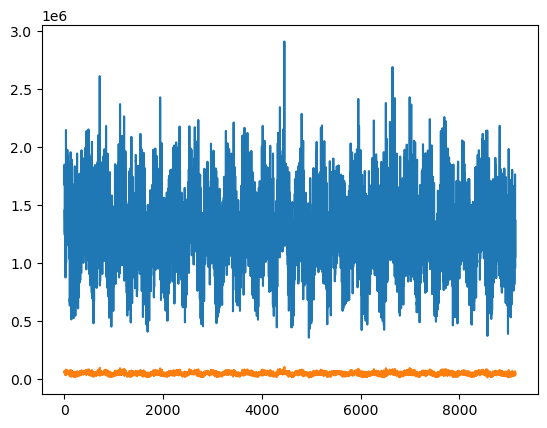

In [28]:
plt.plot(precip_origin_total,label='Original Precipitation Total')
plt.plot(precip_regridded_total,label='Regridded Precipitation Total')